# <p style = 'text-align:center'> Trabalho de Conclusão da Disciplina de Aprendizado de Máquina:
# <p style = 'text-align: center'> Predição de Índice de Refração em Minerais
Por Guilherme C. de Almeida Sobreira e Henrique Valente Nogueira

# <p style='text-align: center;'> Introdução

Materiais ópticos vêm sido utilizados há séculos para os mais diversos propósitos, como para ampliar ou expandir o campo de visão, por propósitos estéticos, para a construção de lasers e outros. Grande parte desses usos depende de propriedades físicas dos materiais, como por exemplo o índice de refração. O índice de refração mede a razão da velocidade da luz no objeto em relação ao seu meio, e, pela lei de Snell-Descartes, é capaz de distorcer a angulação da luz. A fórmula do índice de refração é: 
$$
n = \frac{c}{v}
$$

Em que $n$ é o índice de refração, $c$ é a velocidade da luz e $v$ é a velocidade do objeto no meio analisado.

Por causa disso, é de interesse comercial e científico o desenvolvimento de algoritmos capazes de predizer o índice de refração de materiais, de maneira que se possa procurar características específicas. Neste trabalho, utilizamos diferentes modelos e técnicas de aprendizado de máquina para encontrar o índice de refração de minerais. O conjunto foi obtido de um dataset didático sobre mineralogia e suas colunas indicam características físicas e químicas de diferentes minerais. 

# <p style = 'text-align:center;'> Metodologia

Um dataset didático de mineralogia foi obtido. As instruções de acesso a esse dado, bem como a explicação de todas as informações a respeito desses dados estão disponíveis no Github. Esses dados foram tratados para excluir minerais que o índice de refração é desconhecido. É de interesse do projeto avaliar se uma seleção de atributos melhor performa nas métricas de erro quando comparada à utilização dos dados brutos. Por isso, os modelos foram treinados com o dataset original e também com um dataset de dimensionalidade reduzida. Para reduzir a dimensionalidade dos dados, foi utilizada a seleção por fator de inflação de variância (VIF). Os dados foram divididos em "treino" e "teste", com uma semente aleatória definida. Uma função definida foi utilizada para analisar as métricas de erro e um gráfico visual plotado para cada diferente modelo. 

## <p style = 'text-align:center;'> Download do dataframe

O dataframe foi obtido por um conjunto de dados de mineralogia e salvo como "Minerals_Database.csv". Ele foi extraído pela biblioteca `Pandas` e os minerais que tem índice de refração menor que zero foram excluídos (pois, nesse caso, eram minerais cujo índice de refração é desconhecido). Os parâmetros (significado de cada coluna) do dataframe podem ser consultados no Github. O caminho virtual para o download do Dataframe está presente nas referências e no Github, também referenciado abaixo.

In [1]:
import pandas as pd
dataframe = pd.read_csv('Minerals_Database.csv')
dataframe

,Unnamed: 0,Name,Crystal Structure,Mohs Hardness,Diaphaneity,Specific Gravity,Optical,Refractive Index,Dispersion,Hydrogen,...,Acetate,Phosphate,Sulphate,Carbonate,Ammonium,Hydrated Water,count,Molar Mass,Molar Volume,Calculated Density
0,0,Abenakiite-(Ce),5.0,4.50,0.0,3.240,3.0,1.580,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,23.0,817.339002,0.123390,5.498
1,1,Abernathyite,4.0,2.75,3.0,3.446,3.0,1.592,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,9.0,435.069330,0.056083,6.439
2,2,Abhurite,5.0,2.00,3.0,4.420,3.0,2.085,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,17.0,921.092220,0.122631,6.234
3,3,Abswurmbachite,0.0,0.00,0.0,0.000,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,12.0,550.019900,0.033658,13.563
4,4,Actinolite,2.0,5.50,2.0,1.050,4.0,1.634,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,28.0,861.185368,0.112074,6.378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3107,3107,Zoltaiite,0.0,0.00,0.0,0.000,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,17.0,677.090039,0.067308,8.349
3108,3108,Zugshunstite-(Ce),0.0,0.00,0.0,0.000,0.0,0.000,0.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,33.0,1005.674169,0.280205,2.979
3109,3109,Zvyaginite,0.0,0.00,0.0,0.000,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,38.0,1037.626464,0.179472,4.799
3110,3110,Zwieselite,0.0,0.00,0.0,0.000,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,225.663765,0.056017,3.344


Vamos analisar as colunas desse dataframe:

In [2]:
colunas = list(dataframe.columns)
colunas

['Unnamed: 0',
 'Name',
 'Crystal Structure',
 'Mohs Hardness',
 'Diaphaneity',
 'Specific Gravity',
 'Optical',
 'Refractive Index',
 'Dispersion',
 'Hydrogen',
 'Helium',
 'Lithium',
 'Beryllium',
 'Boron',
 'Carbon',
 'Nitrogen',
 'Oxygen',
 'Fluorine',
 'Neon',
 'Sodium',
 'Magnesium',
 'Aluminium',
 'Silicon',
 'Phosphorus',
 'Sulfur',
 'Chlorine',
 'Argon',
 'Potassium',
 'Calcium',
 'Scandium',
 'Titanium',
 'Vanadium',
 'Chromium',
 'Manganese',
 'Iron',
 'Cobalt',
 'Nickel',
 'Copper',
 'Zinc',
 'Gallium',
 'Germanium',
 'Arsenic',
 'Selenium',
 'Bromine',
 'Krypton',
 'Rubidium',
 'Strontium',
 'Yttrium',
 'Zirconium',
 'Niobium',
 'Molybdenum',
 'Technetium',
 'Ruthenium',
 'Rhodium',
 'Palladium',
 'Silver',
 'Cadmium',
 'Indium',
 'Tin',
 'Antimony',
 'Tellurium',
 'Iodine',
 'Xenon',
 'Cesium',
 'Barium',
 'Lanthanum',
 'Cerium',
 'Praseodymium',
 'Neodymium',
 'Promethium',
 'Samarium',
 'Europium',
 'Gadolinium',
 'Terbium',
 'Dysprosium',
 'Holmium',
 'Erbium',
 'Thuli

Então, temos o nome, uma coluna que qualifica a estrutura cristalina, a escala de dureza de mohs, a diafaneidade (capacidade do material de transmitir luz), a gravidade específica, 'optical' (descreve se o material é isotrópico, biaxial ou anisotrópico), o próprio índice de refração, a dispersão (mudança no índice de refração de acordo com a frequência), a quantidade de átomos de cada elemento químico na fórmula química do mineral, a soma do número de átomos na fórmula química, a massa molar, o volume molar e a densidade calculada.

Vamos analisar algumas estatísticas descritivas de nosso target:

In [3]:
desvio_padrao = dataframe['Refractive Index'].std()
media = dataframe['Refractive Index'].mean()
mediana = dataframe['Refractive Index'].median()
max_ = max(dataframe['Refractive Index'])
min_ = min(dataframe['Refractive Index'])
print('Média:', media)
print()
print('Mediana:', mediana)
print()
print('Desvio padrão:', desvio_padrao)
print()
print('Valor mínimo:', min_)
print()
print('Valor máximo:', max_)


Média: 0.32362564267352184

Mediana: 0.0

Desvio padrão: 0.678769217920915

Valor mínimo: 0.0

Valor máximo: 3.383


Esses dados fornecem algumas estatísticas interessantes. Materiais que o índice de refração não pôde ser obtido o tiveram considerados como "0".Isso mostra a necessidade de fazer tratamento de dados para retirar essas unidades, já que não refletem a realidade física dos materiais. Além disso, os nossos dados estão em um intervalo entre 0 a 3.383, o que não é um intervalo grande. A maior parte dos dados é 0, já que a mediana é 0 e o valor mínimo também.

## <p style = 'text-align:center;'> Tratamento dos dados

Os dados precisam ser convertidos em `float` para poderem ser manipulados computacionalmente. Isso pode ser feito pelo `astype`, que converte os dados das colunas em um tipo específico. O procedimento do VIF pode, caso necessário, ser consultado em fontes educacionais de aprendizado de máquina [4]. Foram excluídos cerca de 2500 minerais, que não tinham o índice de refração conhecido.

### Conversão dos dados para o tipo 'float'

A primeira coluna não foi convertida, pois corresponde ao index e ao nome dos minerais. por isso, a conversão só ocorreu para n>1. 

In [4]:
n = 2
while n < 140:
    dataframe.iloc[:, n] = dataframe.iloc[:, n].astype(float)  # Converte os valores da coluna para float
    n += 1
dataframe = dataframe.loc[dataframe['Refractive Index'] >0] #eliminação de minerais sem informações
dataframe.pop('Unnamed: 0')
df = dataframe.copy()
df.pop('Name')
df

,Crystal Structure,Mohs Hardness,Diaphaneity,Specific Gravity,Optical,Refractive Index,Dispersion,Hydrogen,Helium,Lithium,...,Acetate,Phosphate,Sulphate,Carbonate,Ammonium,Hydrated Water,count,Molar Mass,Molar Volume,Calculated Density
0,5.0,4.50,0.0,3.240,3.0,1.580,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,23.0,817.339002,0.123390,5.498
1,4.0,2.75,3.0,3.446,3.0,1.592,0.000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,9.0,435.069330,0.056083,6.439
2,5.0,2.00,3.0,4.420,3.0,2.085,0.000,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,17.0,921.092220,0.122631,6.234
4,2.0,5.50,2.0,1.050,4.0,1.634,0.000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,28.0,861.185368,0.112074,6.378
5,2.0,3.50,3.0,3.295,4.0,1.457,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,8.0,225.618151,0.044887,4.172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,4.0,7.50,1.0,4.650,3.0,1.928,0.039,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,14.0,526.041800,0.078468,5.564
805,3.0,6.50,2.0,3.230,4.0,1.702,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,17.0,379.378178,0.100890,3.121
806,3.0,3.50,3.0,2.180,1.0,1.590,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,19.0,492.887716,0.078566,5.207
807,0.0,7.00,2.0,3.411,2.0,1.596,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,12.0,263.580584,0.089458,2.446


Vamos analisar estatísticas descritivas sobre nosso target (índice de refração) depois de nosso tratamento:

In [5]:
desvio_padrao = df['Refractive Index'].std()
media = df['Refractive Index'].mean()
mediana = df['Refractive Index'].median()
max_ = max(df['Refractive Index'])
min_ = min(df['Refractive Index'])
print('Média:', media)
print()
print('Mediana:', mediana)
print()
print('Desvio padrão:', desvio_padrao)
print()
print('Valor mínimo:', min_)
print()
print('Valor máximo:', max_)


Média: 1.712794217687075

Mediana: 1.646

Desvio padrão: 0.24158794696015512

Valor mínimo: 0.989

Valor máximo: 3.383


Após o tratamento dos dados, podemos perceber que a mediana se deslocou para um valor maior. Os valores da mediana e da média indicam que a distribuição dos dados se aproxima de alguma forma a um valor entre 1.6 a 1.75. O desvio padrão mostra que há uma variação nos dados de aproximadamente 0.24 unidades.

Não são esperados valores abaixo de 1, porque isso significaria que a luz viaja mais rápido no material do que no próprio vácuo. Ao investigar o motivo de haver um índice de refração menor do que 1, percebemos que os índices foram determinados experimentalmente e foram importados ao dataframe didático de fontes de dados públicos, podendo haver erros. Como o dado se aproxima estatisticamente de 1, não houve necessidade dele ser excluído.

### Definição de Features e Target

Os features (atributos) são parâmetros do dataframe que serão utilizados como base dos algoritmos de previsão. Os target são atributos que serão preditos.

In [6]:
ATRIBUTOS = list(df.columns.values)
ATRIBUTOS.remove('Refractive Index')
TARGET = ["Refractive Index"]
X = df.reindex(ATRIBUTOS, axis = 1)
y = df.reindex(TARGET,axis=1).values.ravel()

### Seleção de atributos

A seleção por VIF não está disponível na biblioteca `sci-kit`. Por isso, podemos criar uma função que a realiza. A função que criaremos foi baseada no material didático da disciplina de Aprendizado de Máquina da Ilum - Escola de Ciência, em um documento intitulado "ATP-203 7.1 - Seleção de Atributos" [5] . Para isso, importamos um modelo de regressão linear. A seleção por VIF recolhe os valores de um dataframe. O VIF é calculado por:
$$
VIF = \frac{1}{(1 - R^{2})}
$$
Existe um limiar optativo para o VIF. Um padrão exigente é o 5. Se a coluna tiver um VIF maior que o limiar, ela é eliminada.

In [7]:
from sklearn.linear_model import LinearRegression
import pandas as pd

def selecao_vif(df_atributos, limiar_vif = 5):
    #cópia do dataframe argumento
    df = df_atributos.copy()
    # Loop para remover atributos com VIF acima do limiar
    while True:
        VIFs = []
        # Calcular o VIF para cada coluna
        for col in df.columns:
            X = df.drop(col, axis=1).values  
            y = df[col].values       
            # Treina o modelo e obtém o R²
            r_quadrado = LinearRegression().fit(X, y).score(X, y)
            if r_quadrado < 1:
                VIF = 1 / (1 - r_quadrado)
            else:
                VIF = float("inf")  # Define VIF infinito se R² = 1
            VIFs.append(VIF)
        VIF_maximo = max(VIFs)
        # Se o maior VIF estiver acima do limiar, remove o atributo correspondente
        if VIF_maximo > limiar_vif:
            indice = VIFs.index(VIF_maximo)
            coluna_remocao = df.columns[indice]
            df = df.drop(coluna_remocao, axis=1)
        else:
            break  
    return df

### Split de dados

É necessário fazer uma divisão de dados para que possamos analisar eficientemente as métricas. Esses dados serão divididos em treino e teste, pela função `train_test_split` da biblioteca `scikit`.  O tamanho foi definido para 70% de dados treino e o restante para validação. A semente aleatória, utilizada na divisão, foi 774. O código foi apropriado pelo material de aula da disciplina de Aprendizado de Máquina na Ilum - Escola de Ciência, ministrada pelo Prof. Daniel Cassar [6].

In [8]:
from sklearn.model_selection import train_test_split
TAMANHO_TESTE = 0.3
SEMENTE_ALEATORIA = 774

indices = df.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)
#para a totalidade dimensional
df_treino = df.loc[indices_treino]
df_teste = df.loc[indices_teste]

### Seleção de atributos dos dados de teste por VIF

Vamos utilizar a seleção VIF em cima dos dados de treino. O conjunto de dados gerado será o modelo teste que utilizaremos para comparar se a seleção VIF resultou em modelos com melhores performances quando comparada com modelos que foram treinados com todos os dados.

In [9]:
df_vif = selecao_vif(df_treino,5)
df_vif

,Crystal Structure,Mohs Hardness,Diaphaneity,Specific Gravity,Optical,Refractive Index,Dispersion,Boron,Carbon,Nitrogen,...,Tantalum,Tungsten,Lead,Bismuth,Thorium,Uranium,Hydroxyl,Ammonium,Hydrated Water,Calculated Density
383,1.0,2.25,2.0,0.000,4.0,1.594,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,6.397
659,5.0,7.25,3.0,6.700,3.0,2.035,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.917
451,3.0,5.50,1.0,3.700,4.0,1.888,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.291
6,3.0,3.50,0.0,4.400,4.0,1.742,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.010
157,2.0,4.50,3.0,3.280,4.0,2.047,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,4.0,6.00,0.0,3.360,3.0,1.723,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.574
312,2.0,2.50,0.0,6.960,4.0,1.880,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.164
439,3.0,4.00,0.0,3.800,4.0,1.746,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.952
433,3.0,5.00,3.0,4.000,4.0,2.217,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.255


### Discussão

A seleção por VIF eliminou 75 atributos de nosso dataset. Não é a intenção deste trabalho analisar as razões para isso, apesar de estar no escopo da ciência de dados. Isso facilitará os modelos, pois casos com alta dimensionalidade podem prejudicar certos modelos. Por exemplo, o modelo $K-NN$ se baseia na distância (normalmente euclidiana) entre as features de treino mais próximas da feature do ponto a ser determinado. Em altas dimensões, a distância euclidiana perde sentido porque seu valor não varia de forma que pontos mais distantes tenham um valor de distância maior. Dessa forma, o modelo $K-NN$ passa a considerar pontos que não necessariamente estão mais perto do nosso alvo, fazendo uma predição errada.

Vamos analisar quais foram as features que foram selecionadas pelo VIF:

In [10]:
caracteristicas = list(df_vif.columns)
caracteristicas

['Crystal Structure',
 'Mohs Hardness',
 'Diaphaneity',
 'Specific Gravity',
 'Optical',
 'Refractive Index',
 'Dispersion',
 'Boron',
 'Carbon',
 'Nitrogen',
 'Fluorine',
 'Sodium',
 'Magnesium',
 'Aluminium',
 'Silicon',
 'Phosphorus',
 'Sulfur',
 'Chlorine',
 'Potassium',
 'Calcium',
 'Scandium',
 'Titanium',
 'Vanadium',
 'Chromium',
 'Manganese',
 'Iron',
 'Cobalt',
 'Nickel',
 'Copper',
 'Zinc',
 'Germanium',
 'Arsenic',
 'Selenium',
 'Rubidium',
 'Strontium',
 'Yttrium',
 'Zirconium',
 'Niobium',
 'Molybdenum',
 'Silver',
 'Cadmium',
 'Tin',
 'Antimony',
 'Tellurium',
 'Iodine',
 'Cesium',
 'Barium',
 'Lanthanum',
 'Cerium',
 'Terbium',
 'Hafnium',
 'Tantalum',
 'Tungsten',
 'Lead',
 'Bismuth',
 'Thorium',
 'Uranium',
 'Hydroxyl',
 'Ammonium',
 'Hydrated Water',
 'Calculated Density']

Percebemos que, além da contagem de certos elementos químicos na fórmula do mineral, também foram excluídos a contagem geral dos átomos na fórmula e a massa molar.

### Armazenamento dos dados de target e features

Vamos agora armazenar todos esses dados. Perceba que teremos os dados de treino e teste para o conjunto que não sofreu seleção de dados e também para o conjunto que sofreu seleção de dados. Isso resultará em seis variáveis armazenadas, pois separamos em X [os dados de features] e em Y [os dados de target] para os dados de treino e teste que serão utilizados nos modelos que foram treinados com os dados que não sofreram seleção e com os dados que passaram por VIF.

In [11]:
#definição dos targets
y_treino = df_treino.reindex(TARGET,axis = 1).values.ravel()
y_teste = df_teste.reindex(TARGET,axis = 1).values.ravel()
#definição das features dos dados sem seleção de atributos:
X_treino = df_treino.reindex(ATRIBUTOS,axis=1)
X_teste = df_teste.reindex(ATRIBUTOS,axis=1)
#definição das features dos dados com VIF:
ATRIBUTOSv = list(df_vif.columns.values)
ATRIBUTOSv.remove('Refractive Index')
X_vif_treino = df_vif.reindex(ATRIBUTOSv,axis=1)
X_vif_teste = df_teste.reindex(ATRIBUTOSv, axis=1)

### Modelo de gráfico com parâmetros de erro

Para padronizar a análise das métricas, definiremos uma função. Essa função receberá o modelo a ser analisado. Ela plotará um gráfico com as métricas de erro, do dado previsto em função do dado real. As métricas serão MSE, RMSE, R².

In [12]:
import matplotlib.pyplot as plt
from statistics import mean
from sklearn.metrics import mean_squared_error, r2_score
def grafico_metricas_erro(xtreino,ytreino,xteste,yteste,modelo):
    modelo.fit(xtreino,ytreino)
    #métricas de erro
    y = modelo.predict(xteste)
    r = r2_score(yteste, y)
    r = f'{r:.2f}'
    mse = mean_squared_error(y,yteste, squared = True)
    mse = f'{mse:.2f}'
    rmse = mean_squared_error(y,yteste, squared = False)
    c = mean(y)
    #Plotagem dos gráficos
    plt.scatter(yteste,y,color = 'hotpink', alpha = 0.7)
    plt.scatter(c,c,color='white',alpha=0.1,label = f'$R^2$ = {r}')
    plt.scatter(c,c,color='white',alpha=0.1,label = f'$MSE$ = {mse}')
    plt.scatter(c,c,color='white',alpha=0.1,label = f'$RMSE$ = {rmse}')
    plt.title(f'índice de Refração previsto em função do Índice de Refração real para o modelo {str(modelo)}')
    plt.xlabel('Índice de Refração real')
    plt.ylabel('Índice de Refração previsto')
    plt.grid(axis = 'y')
    plt.legend()
    plt.show()
    return [r, mse,rmse]

Também queremos saber se treinar modelos com dados reduzidos pela seleção de atributos VIF resulta em um modelo com melhor performance nas métricas de erro. Para isso, definimos a função `teste`, que treina o modelo ambos os dados (o completo e o com seleção de atributos), exibe a performance nas métricas de erro e compara ambas, dizendo qual tipo de dado resultou em um modelo com melhores performances.

In [13]:
#função-mãe para os testes
def teste(modelo):
    print('Para o VIF:')
    vif = grafico_metricas_erro(X_vif_treino,y_treino,X_vif_teste, y_teste,modelo)
    print('Para o Sem Tratamento:')
    normal = grafico_metricas_erro(X_treino,y_treino,X_teste,y_teste,modelo)
    if vif[2]<normal[2]:
        print(f'As estatísticas de erro do modelo sem tratamento tiveram pior desempenho que o modelo por VIF:')
        print('')
        print('Estatísticas do VIF:')
        print(vif)
        print('----')
        print('Estatísticas do modelo sem tratamento:')
        print(normal)
    elif vif[2]>normal[2]:
        print(f'As estatísticas de erro do modelo vif tiveram pior desempenho que o modelo sem tratamento:')
        print('')
        print('Estatísticas do modelo sem tratamento:')
        print(normal)
        print('----')
        print('Estatísticas do modelo vif:')
        print(vif)
    elif vif[2] == normal[2]:
        print(f'As estatísticas de erro do modelo vif tiveram igual desempenho ao modelo sem tratamento:')
        print('')
        print('Estatísticas:')
        print(normal)

# <p style = 'text-align:center;'> Treinamento de Modelos

Diferentes modelos serão treinados para analisar a performance de cada um deles. O modelo mais simples possível é o modelo Baseline, que considera que todas as previsões serão a média do conjunto de treino. As métricas de erro de outros modelos devem ser comparadas a esse modelo.

## <p style= 'text-align: center;'> Modelo Baseline

Como dito, o modelo baseline se baseia na média dos atributos. Ele pode ser feito pela biblioteca `scikit-learn`. Ele é a base para a métrica da performance dos demais modelos: se um modelo não consegue ter melhor desempenho que o próprio baseline, então ele não deveria sequer ser considerado.

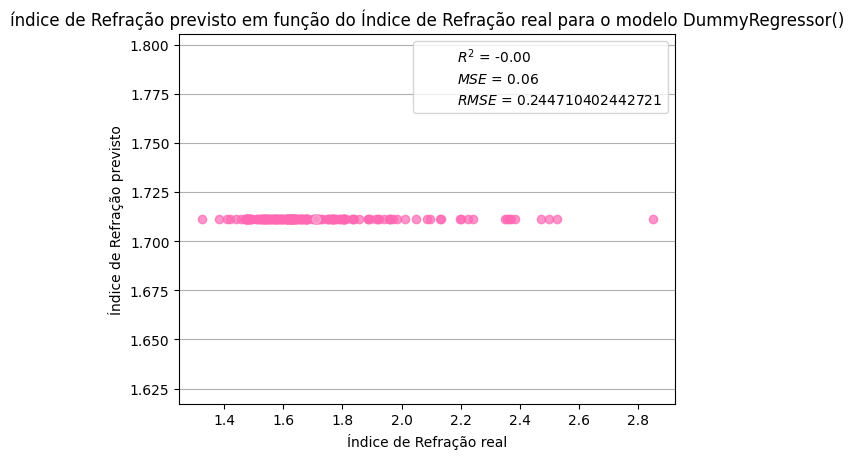

['-0.00', '0.06', 0.244710402442721]

In [14]:
import pandas as pd
from sklearn.dummy import DummyRegressor

baseline = DummyRegressor(strategy="mean")

# grafico_metricas_erro(X_treino,y_treino,X_teste,y_teste, baseline)
grafico_metricas_erro(X_vif_treino,y_treino,X_vif_teste,y_teste, baseline)


Para o VIF:


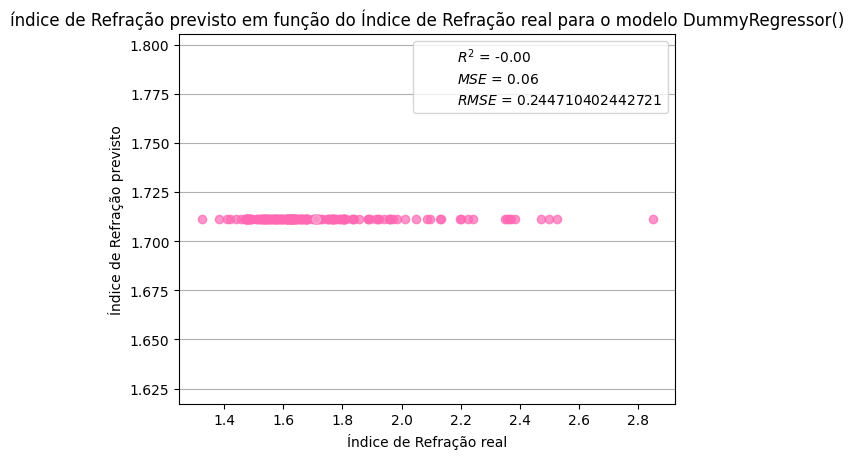

Para o Sem Tratamento:


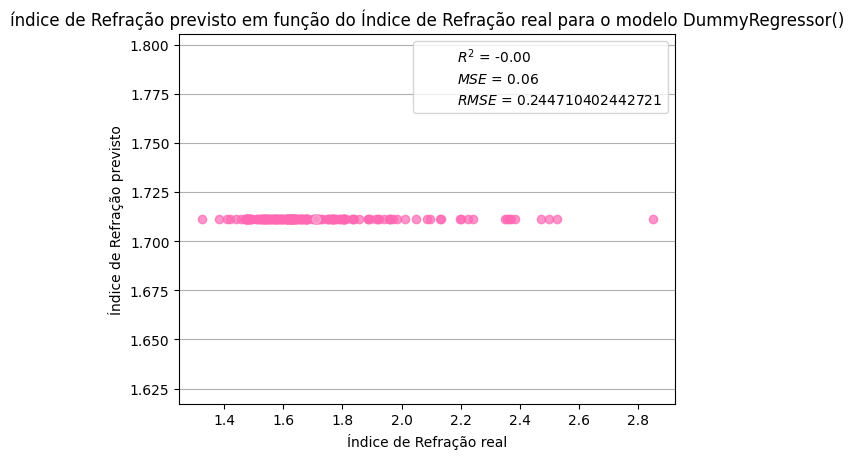

As estatísticas de erro do modelo vif tiveram igual desempenho ao modelo sem tratamento:

Estatísticas:
['-0.00', '0.06', 0.244710402442721]


In [15]:
teste(baseline)

### Discussão

Além de devermos tomar 0.244 como parâmetro para RMSE, notamos que não seria esperado os modelos terem métricas diferentes, já que a média dos dados do target não muda com a seleção VIF.

## <p style = 'text-align:center;'> Modelo Linear

O modelo linear considera que o alvo de seu algoritmo é uma combinação linear de todos os seus features, da seguinte forma:
$$
y(x_{1},x{2}, \cdots, x_{n}) = \beta_{0} x_1 + \cdots \beta_{n} x_{n} + \epsilon
$$

Em que y é o target, x são as features, $\beta$ são coeficientes capazes de satisfazer a equação e $\epsilon$ é um erro associado.
Pela biblioteca importada, o cálculo é feito automaticamente.

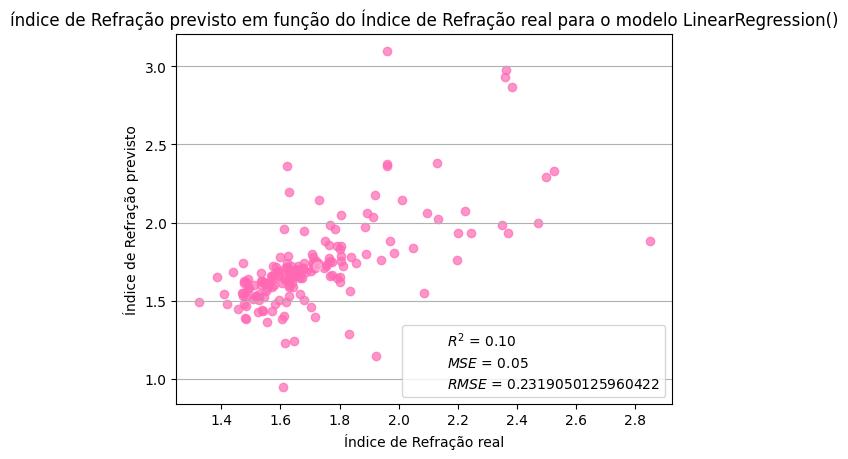

['0.10', '0.05', 0.2319050125960422]

In [16]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
grafico_metricas_erro(X_vif_treino,y_treino,X_vif_teste,y_teste, linear)




Para o VIF:


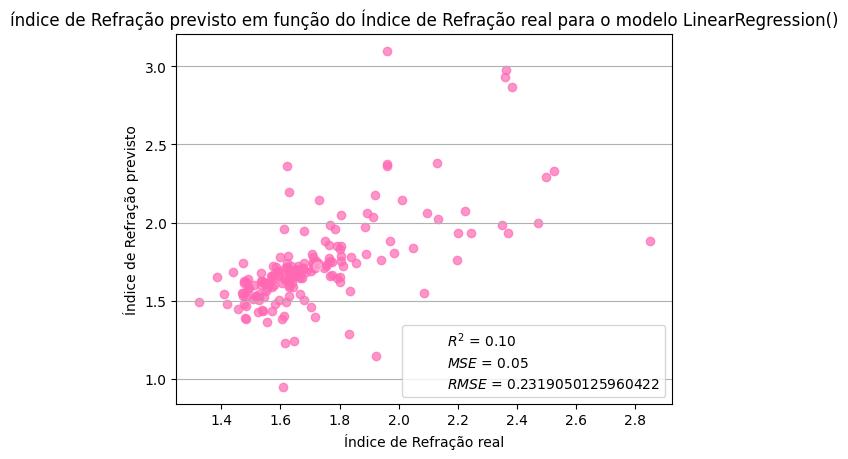

Para o Sem Tratamento:


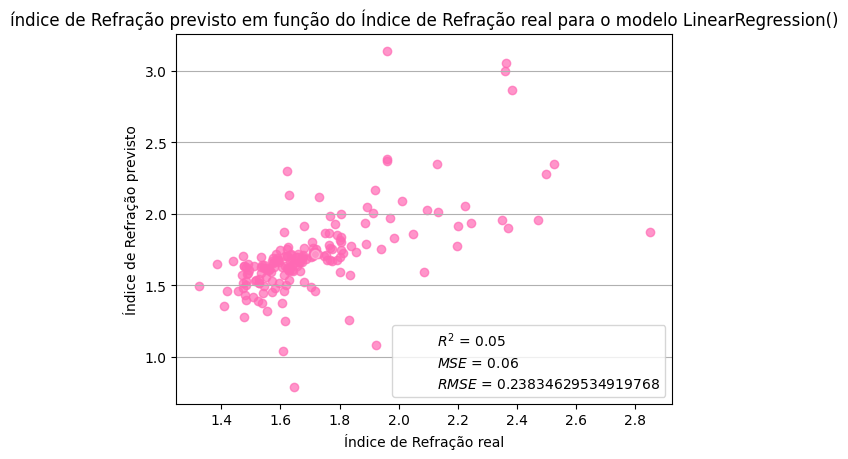

As estatísticas de erro do modelo sem tratamento tiveram pior desempenho que o modelo por VIF:

Estatísticas do VIF:
['0.10', '0.05', 0.2319050125960422]
----
Estatísticas do modelo sem tratamento:
['0.05', '0.06', 0.23834629534919768]


In [17]:
teste(linear)

Como o modelo linear é baseado em equações lineares, a redução da dimensionalidade intuitivamente contribui para um sistema de menos equações, e que portanto propaga menos erro. Por isso, faz sentido o VIF ter tido melhor desempenho.

## <p style = 'text-align:center;'> Modelo Árvore de Decisão

Seguindo a definição da referência [7], uma árvore de decisão "particiona recursivamente os dados em subconjuntos com base nos valores das características selecionadas, criando nós de decisão. Em cada nó, o algoritmo identifica a característica que oferece a divisão ótima dos dados, e esse processo continua até que um critério de parada seja atendido. A árvore resultante pode então ser usada para fazer previsões em novos dados".
Ela pode ser feita pela função `DecisionTreeRregressor`.

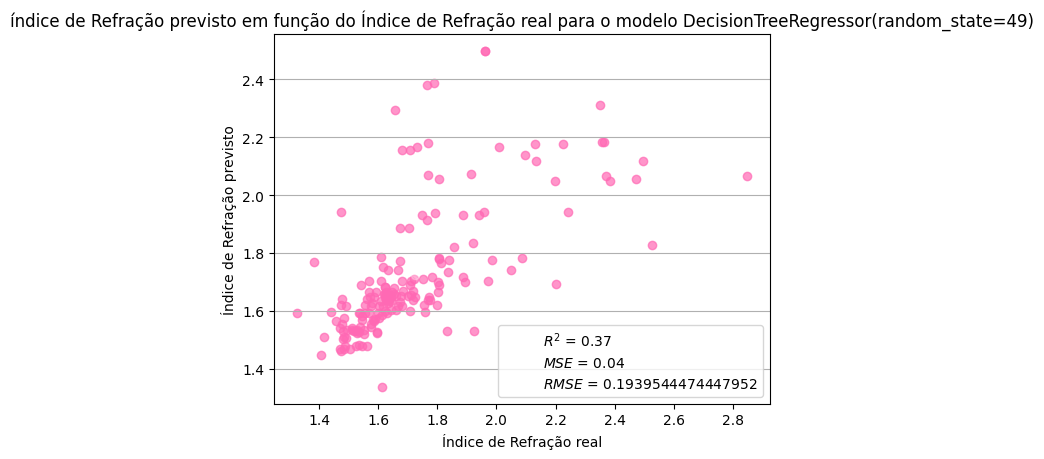

['0.37', '0.04', 0.1939544474447952]

In [18]:
from sklearn.tree import DecisionTreeRegressor
arvore_decisao = DecisionTreeRegressor(random_state = 49)
grafico_metricas_erro(X_vif_treino,y_treino,X_vif_teste,y_teste, arvore_decisao)


Para o VIF:


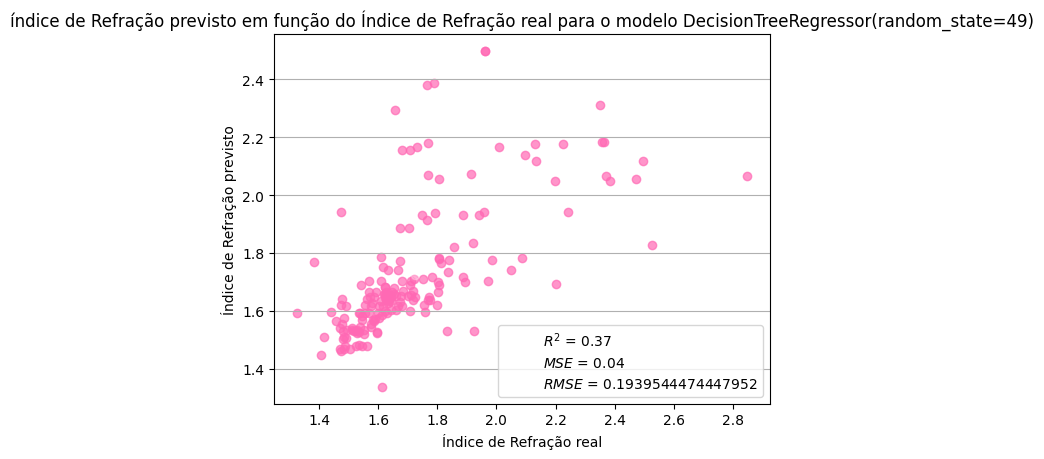

Para o Sem Tratamento:


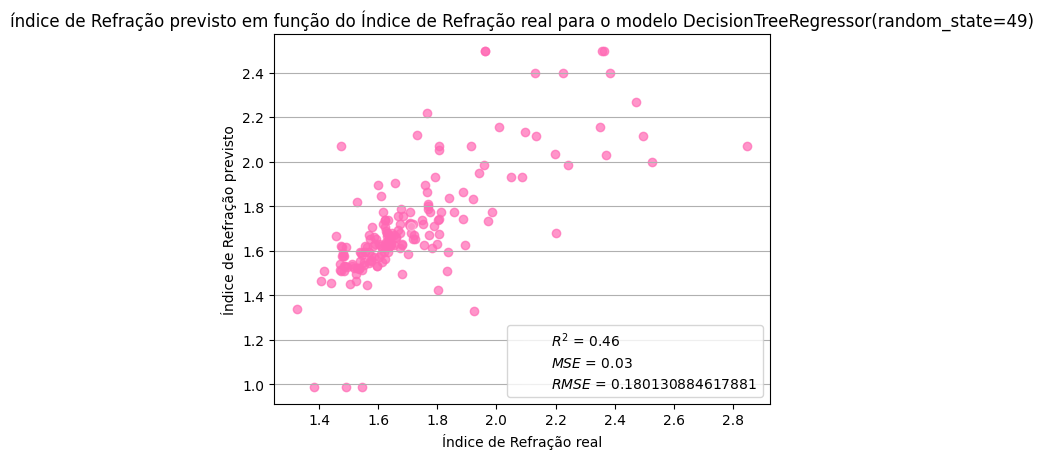

As estatísticas de erro do modelo vif tiveram pior desempenho que o modelo sem tratamento:

Estatísticas do modelo sem tratamento:
['0.46', '0.03', 0.180130884617881]
----
Estatísticas do modelo vif:
['0.37', '0.04', 0.1939544474447952]


In [19]:
teste(arvore_decisao)

### Discussão

A árvore de decisão agrupa os dados de acordo com características selecionadas. Intuitivamente, dados com maiores dimensões podem abrem mais oportunidades para serem divididos e, nesse sentido, é esperado que o modelo que foi treinado sem o tratamento dos dados tenha tido um desempenho melhor. Isso pode deixar de ser verdade caso o modo que dividimos os dados mude, e de fato será o que acontecerá mais a frente.

## <p style = 'text-align:center;'> Modelo de Floresta Aleatória 

O modelo de floresta aleatória considera uma série de árvores de decisão para realizar sua previsão. Por isso, espera-se que sua performance seja melhor do que a de uma árvore de decisão individualmente. 

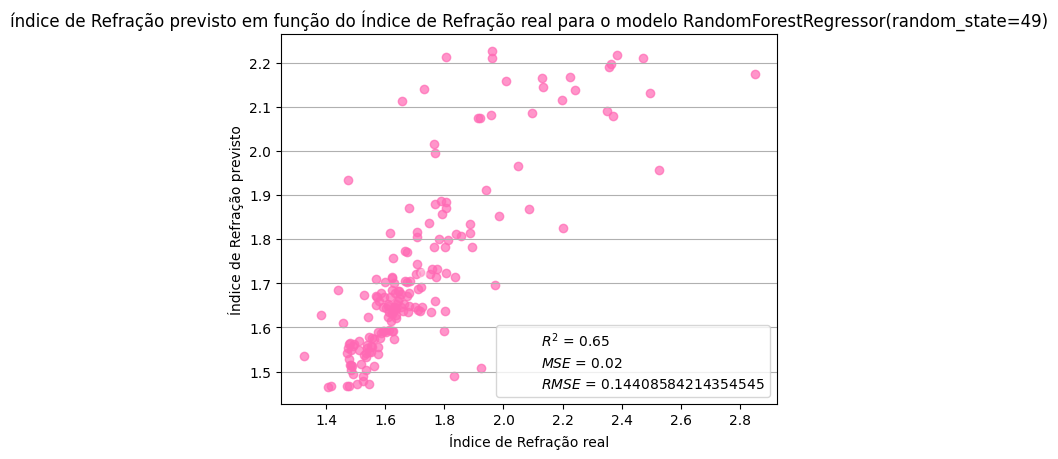

['0.65', '0.02', 0.14408584214354545]

In [20]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=49)
grafico_metricas_erro(X_vif_treino,y_treino,X_vif_teste,y_teste, rf_model)


Para o VIF:


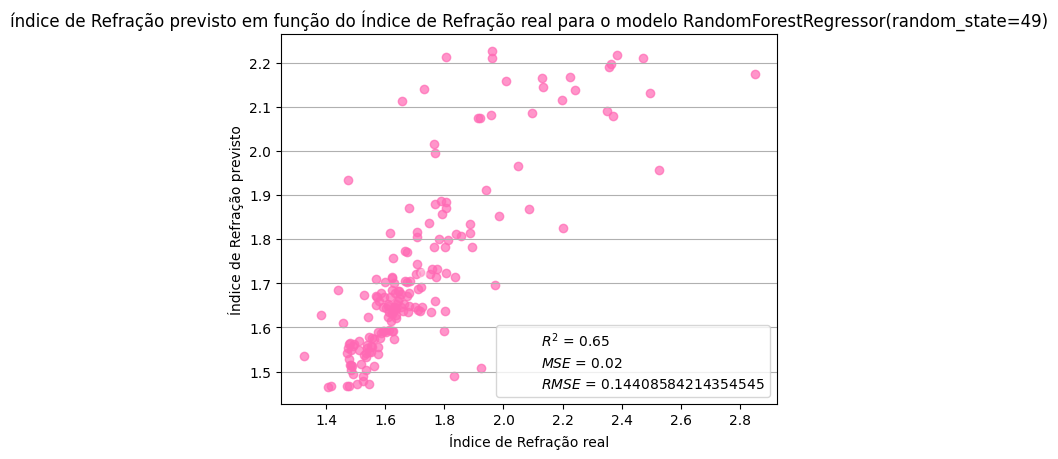

Para o Sem Tratamento:


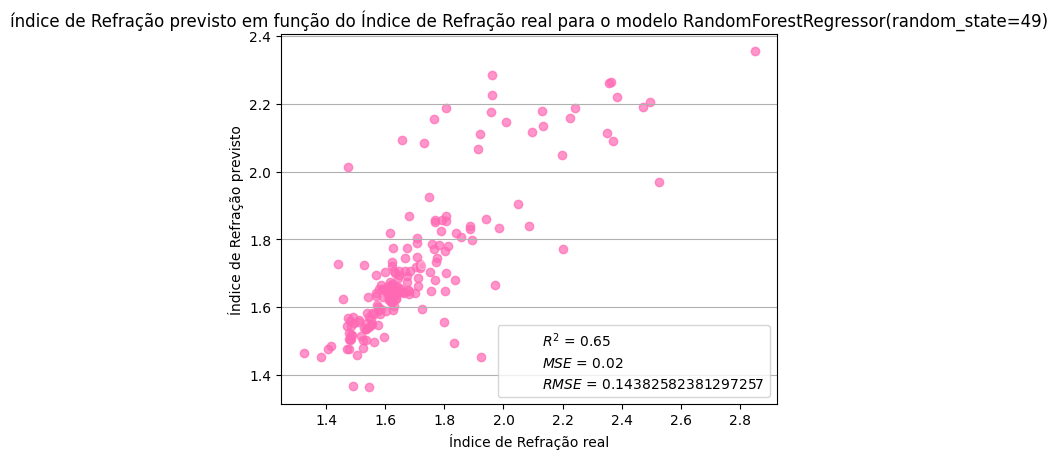

As estatísticas de erro do modelo vif tiveram pior desempenho que o modelo sem tratamento:

Estatísticas do modelo sem tratamento:
['0.65', '0.02', 0.14382582381297257]
----
Estatísticas do modelo vif:
['0.65', '0.02', 0.14408584214354545]


In [21]:
teste(rf_model)

### Discussão

O mesmo resultado é esperado para a floresta aleatória, que conta com um conjunto de árvores de decisão. Apesar disso, nota-se que as duas métricas se aproximam significativamente.

## <p style = 'text-align:center;'> Modelo k-NN

Para problemas de regressão, o modelo k-NN calcula a distância dos dados de teste com os dados de treino. Ele escolherá os $k$ vizinhos com menor distância dos dados de teste e a previsão do target será a média dos valores de target desses vizinhos. Ele pode ser importado pela função `KNeighborsRegressor`, e um valor típico de $k$ é 3. 

Além disso, precisaremos definir o número de núcleos físicos do computador, porque a biblioteca `scikit` utiliza uma outra biblioteca (`joblib`) que não está sendo capaz de fazer isso. Fazemos isso da seguinte forma:

In [22]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"  # Número de núcleos = 4.

Agora, o código:

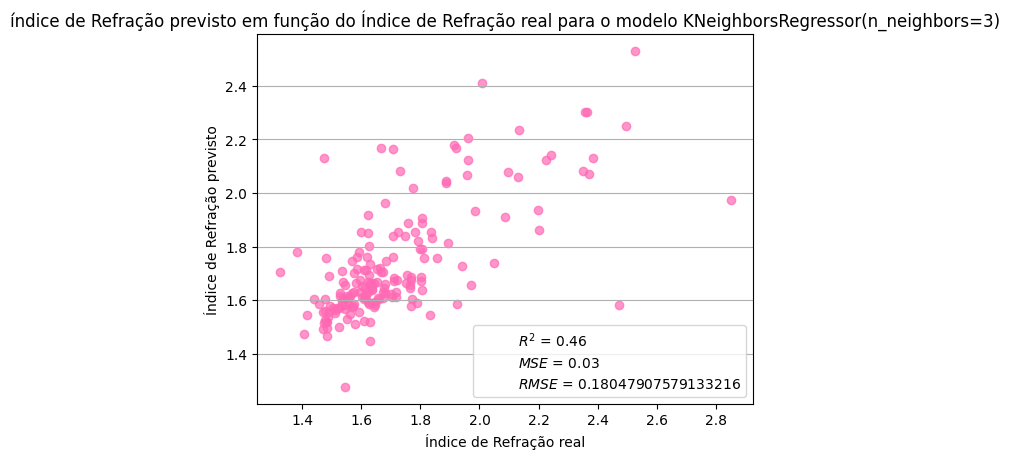

['0.46', '0.03', 0.18047907579133216]

In [23]:
from sklearn.neighbors import KNeighborsRegressor
NUM_VIZINHOS = 3
modelo_knn = KNeighborsRegressor(n_neighbors=NUM_VIZINHOS)
grafico_metricas_erro(X_vif_treino,y_treino,X_vif_teste,y_teste, modelo_knn)

Para o VIF:


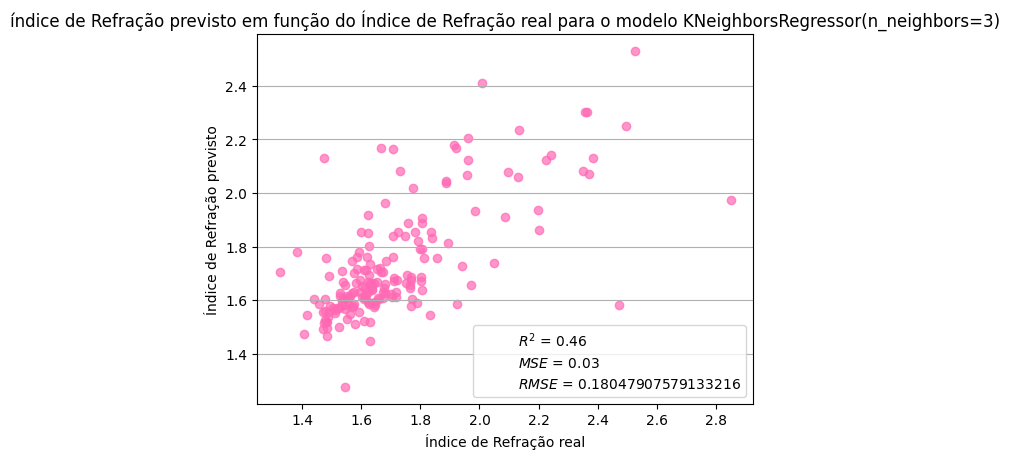

Para o Sem Tratamento:


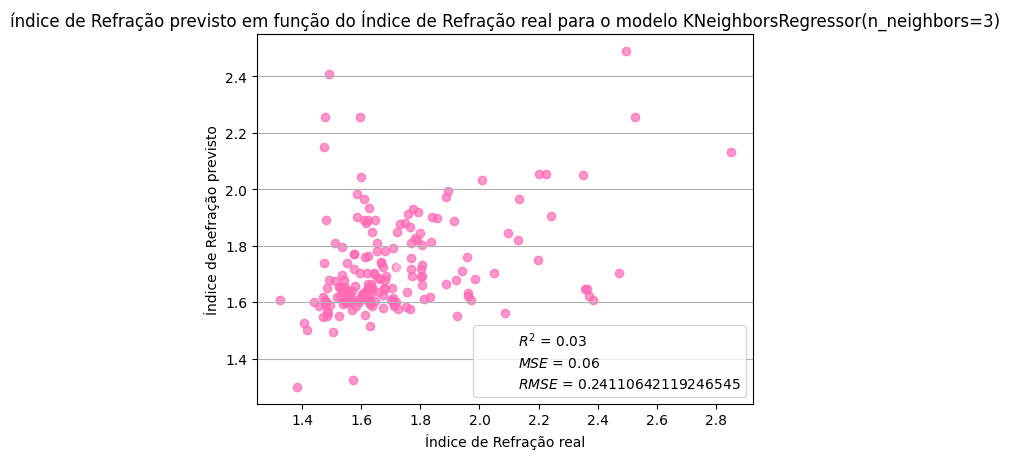

As estatísticas de erro do modelo sem tratamento tiveram pior desempenho que o modelo por VIF:

Estatísticas do VIF:
['0.46', '0.03', 0.18047907579133216]
----
Estatísticas do modelo sem tratamento:
['0.03', '0.06', 0.24110642119246545]


In [24]:
teste(modelo_knn)

### Discussão

O modelo $k-NN$ se baseia na distância (no caso euclidiana) entre os dados. Sabemos que a distância euclidiana não se torna uma métrica confiável na medida em que a dimensionalidade dos dados aumenta. Por isso, faz sentido que o desempenho do modelo treinado com os dados reduzidos por VIF tenha tido uma performance melhor.

## <p style='text-align:center;'> Regressão por Suporte Vetorial (SVR)

O SVR é uma das técnicas de Support Vector Machine (SVM) e busca encontrar um hiperplano capaz de aproximar os dados. Isso é feito por meio da definição de uma função que retorna o hiperplano, com um erro $\gamma$ associado:
$$
f(x) = w^{T}x + \gamma
$$
Essa técnica é útil quando temos dados com dimensionalidade maior, porque encontrar um hiperplano não é prejudicado se o dado possui muitas dimensões. A previsão é feita ajustando os dados do feature de teste ao hiperplano, que resultará no valor de target.

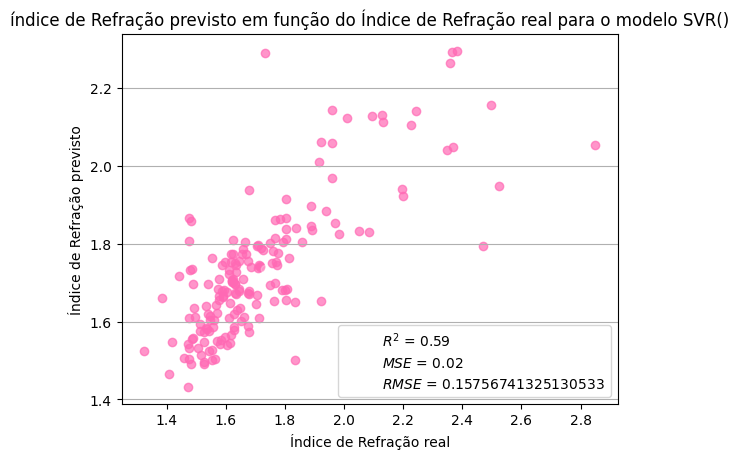

['0.59', '0.02', 0.15756741325130533]

In [25]:
from sklearn.svm import SVR
SVR = SVR(kernel = 'rbf')
grafico_metricas_erro(X_vif_treino,y_treino,X_vif_teste,y_teste, SVR)

Para o VIF:


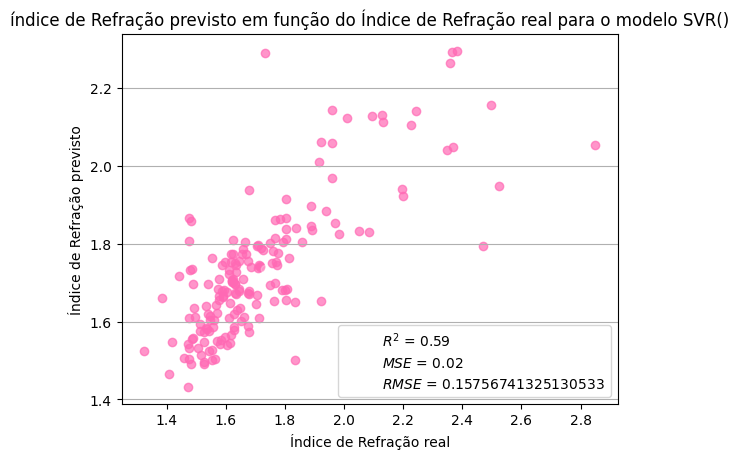

Para o Sem Tratamento:


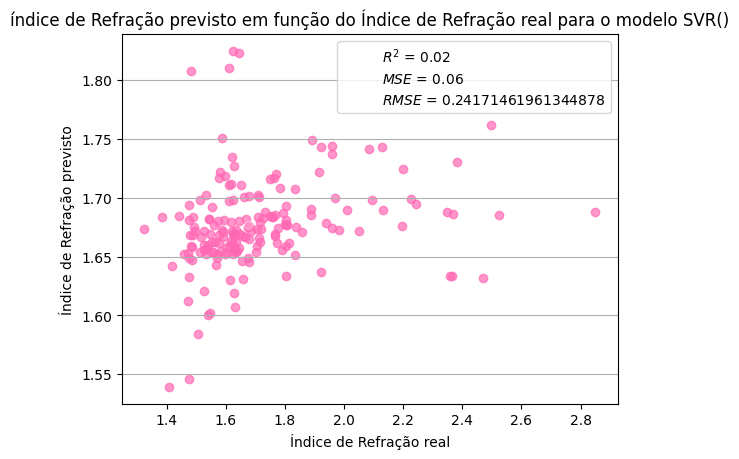

As estatísticas de erro do modelo sem tratamento tiveram pior desempenho que o modelo por VIF:

Estatísticas do VIF:
['0.59', '0.02', 0.15756741325130533]
----
Estatísticas do modelo sem tratamento:
['0.02', '0.06', 0.24171461961344878]


In [26]:
teste(SVR)

### Discussão

A redução da dimensionalidade dos dados pelo VIF reduz também o ruído no hiperplano encontrado pelo modelo SVR, de maneira que a predição consiga seguir uma equação mais fidedigna (com menos erro) quando comparada ao modelo que foi treinado com os dados completo.

## <p style = 'text-align:center;'> Otimização de hiperparâmetros 

Alguns modelos, como a floresta aleatória e o SVR, contam com hiperparâmetros que, apesar de não alterar os dados em si, alteram o funcionamento do algoritmo em relação a esses dados. A otimização de hiperparâmetros busca testar diferentes hiperparâmetros para analisar qual obteve uma melhor performance. A biblioteca `scikit` permite fazer isso pela função `RandomizedSearchCV` ou pela função `GridSearchCV`.
Esta última função testa todas as combinações possíveis dentro de um conjunto de hiperparâmetros pré-definidos, e pode exibir qual foi o conjunto que teve melhor resultado. A função de busca aleatória, no lugar disso, escolhe $n$ vezes aleatoriamente um conjunto de hiperparâmetros dentro do definido.

### Para o SVR

Os hiperparâmetros do SVR são: valor de c, epsilon, kernel, gamma. Todos implicam penalidades durante o cálculo matemático.

In [27]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
svr_model = SVR()
#espaço de busca
parametros = {
    'C': [1, 3, 5, 7, 9],           # Valores discretos para C
    'epsilon': [0, 0.1, 0.2, 0.5,1],     # Valores para epsilon
    'kernel': ['poly', 'rbf','sigmoid'],      # Kernels específicos
    'gamma': ['scale']              # Valor fixo de gamma como 'scale'
}
#busca em grade
busca_em_grade = GridSearchCV(
    estimator=svr_model,
    param_grid=parametros,
    scoring='neg_mean_squared_error',  # Métrica de avaliação: MSE negativo
    cv=5,                             
    n_jobs=-1                          
)
busca_em_grade.fit(X_vif_treino, y_treino)

# Exibindo os resultados
print("Melhores parâmetros:", busca_em_grade.best_params_)
print("Melhor MSE (negativo):", busca_em_grade.best_score_)


Melhores parâmetros: {'C': 3, 'epsilon': 0, 'gamma': 'scale', 'kernel': 'rbf'}
Melhor MSE (negativo): -0.025077779510698017


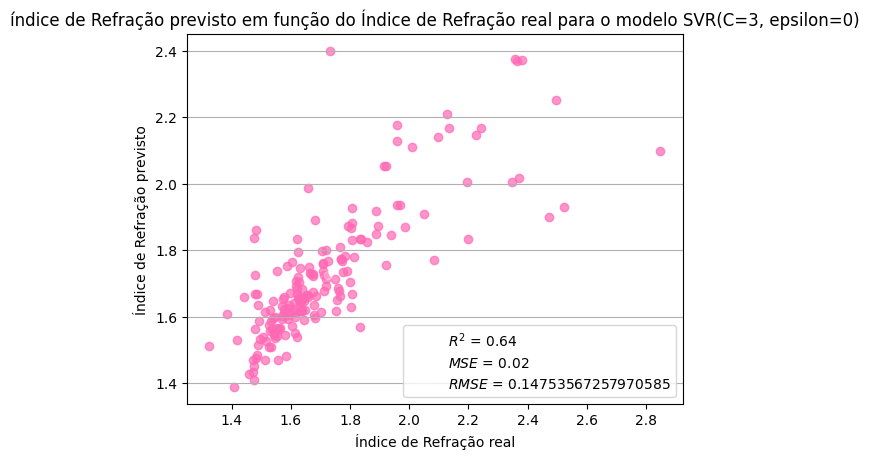

['0.64', '0.02', 0.14753567257970585]

In [28]:
hiperparametros = busca_em_grade.best_params_
from sklearn.svm import SVR
svr = SVR(**hiperparametros)
grafico_metricas_erro(X_vif_treino,y_treino,X_vif_teste,y_teste, svr)


Para o VIF:


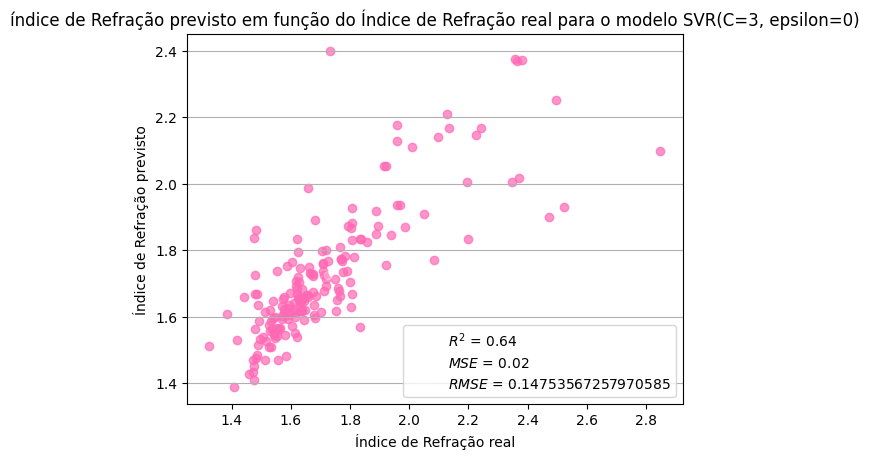

Para o Sem Tratamento:


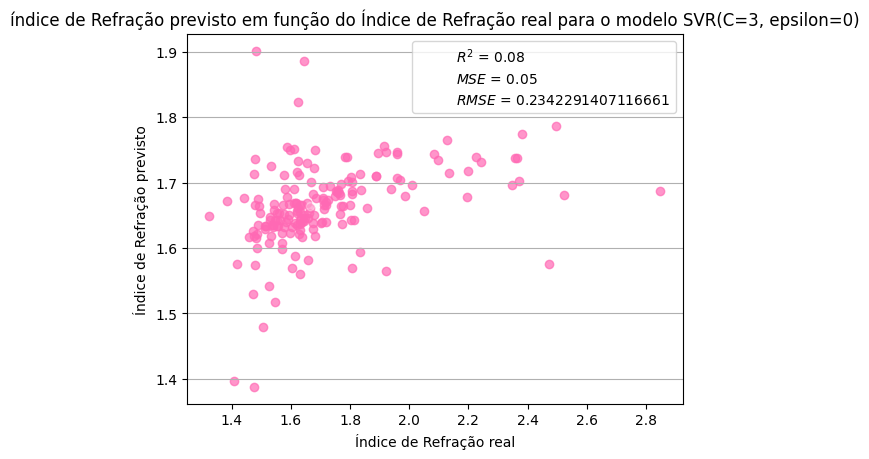

As estatísticas de erro do modelo sem tratamento tiveram pior desempenho que o modelo por VIF:

Estatísticas do VIF:
['0.64', '0.02', 0.14753567257970585]
----
Estatísticas do modelo sem tratamento:
['0.08', '0.05', 0.2342291407116661]


In [29]:
teste(svr)

### Discussão

A otimização de hiperparâmetros busca melhorar a performance do modelo nas métricas de erro a partir da seleção dos hiperparâmetros. Podemos verificar que o RMSE melhorou quando comparado ao modelo treinado sem seleção de hiperparâmetros, e, portanto, fomos bem-sucedidos.

## Para a floresta aleatória 

Os hiperparâmetros para a floresta aleatória são: número de árvores, profundidade máxima, fração mínima de amostras por nó, número mínimo de amostras em uma folha, substituição.

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Definir o modelo
arvore = RandomForestRegressor(random_state=49)

# Definir os parâmetros para a busca
parametros = {
    'n_estimators': randint(50, 300),           # Número de árvores na floresta
    'max_depth': randint(10, 50),               # Profundidade máxima da árvore
    'min_samples_split': randint(2, 10),        # Número mínimo de amostras para dividir um nó
    'min_samples_leaf': randint(1, 10),         # Número mínimo de amostras por folha
    'max_features': [None, 'sqrt', 'log2'],     # Correção: 'auto' substituído por None
    'bootstrap': [True, False]                  # Com ou sem substituição
}

# Configurar a busca aleatória
busca_aleatoria = RandomizedSearchCV(
    estimator=arvore,
    param_distributions=parametros,
    n_iter=100,
    scoring='neg_mean_squared_error',
    cv=5,
    random_state=49,
    n_jobs=-1
)

# Ajustar o modelo aos dados
busca_aleatoria.fit(X_vif_treino, y_treino)

# Exibir os melhores parâmetros e pontuação
print("Melhores parâmetros:", busca_aleatoria.best_params_)
print("Melhor MSE (negativo):", busca_aleatoria.best_score_)


Melhores parâmetros: {'bootstrap': False, 'max_depth': 37, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 169}
Melhor MSE (negativo): -0.022993047256179205


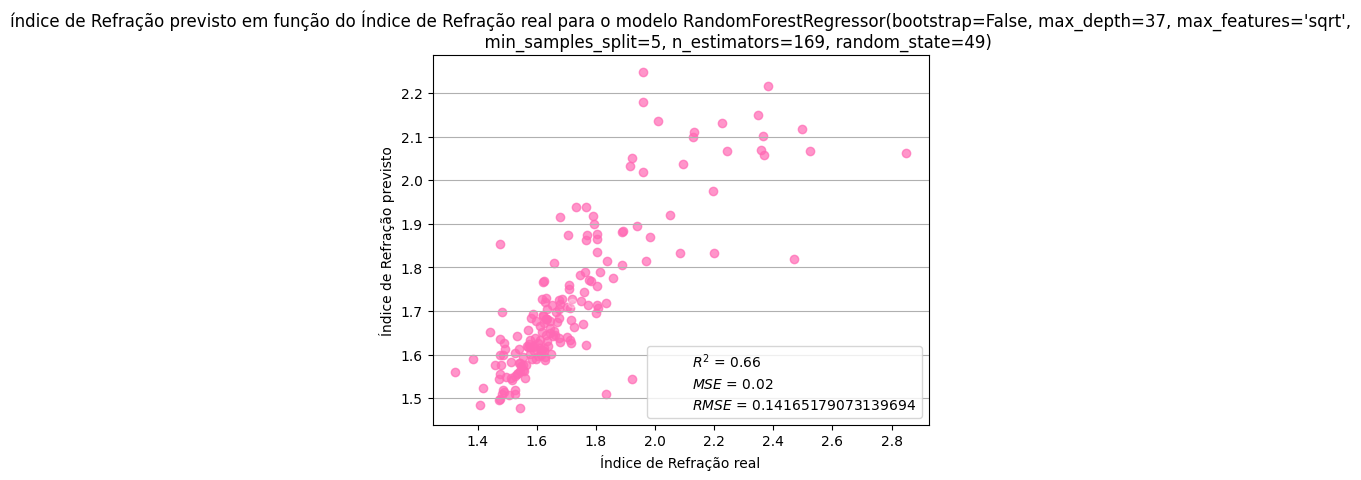

['0.66', '0.02', 0.14165179073139694]

In [31]:
parametros_floresta = busca_aleatoria.best_params_
floresta_aleatoriA = RandomForestRegressor(**parametros_floresta, random_state=49)
grafico_metricas_erro(X_vif_treino,y_treino,X_vif_teste,y_teste, floresta_aleatoriA)


Para o VIF:


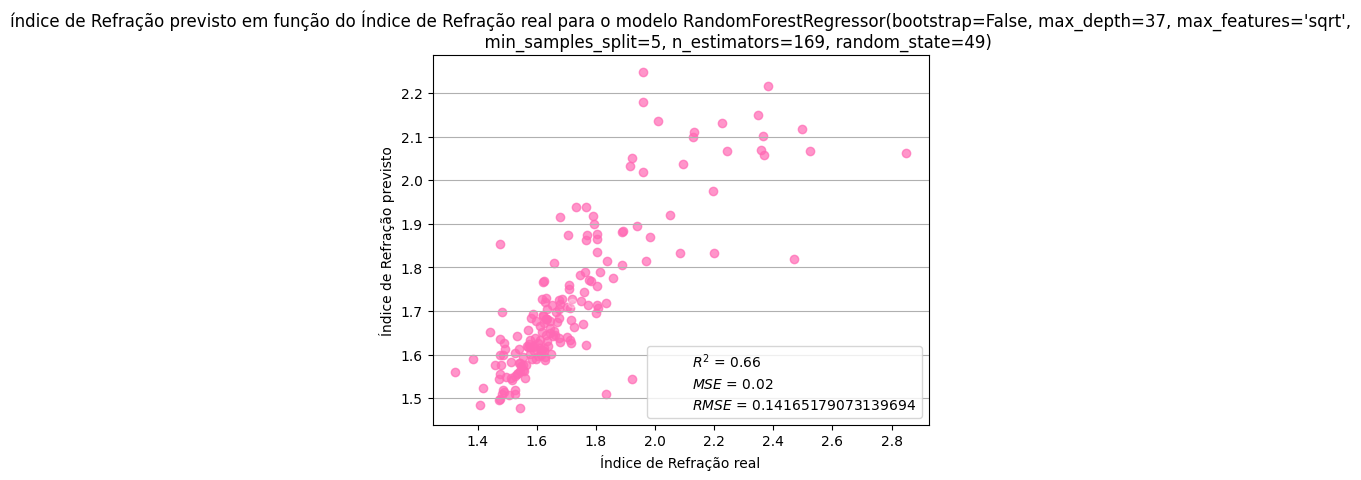

Para o Sem Tratamento:


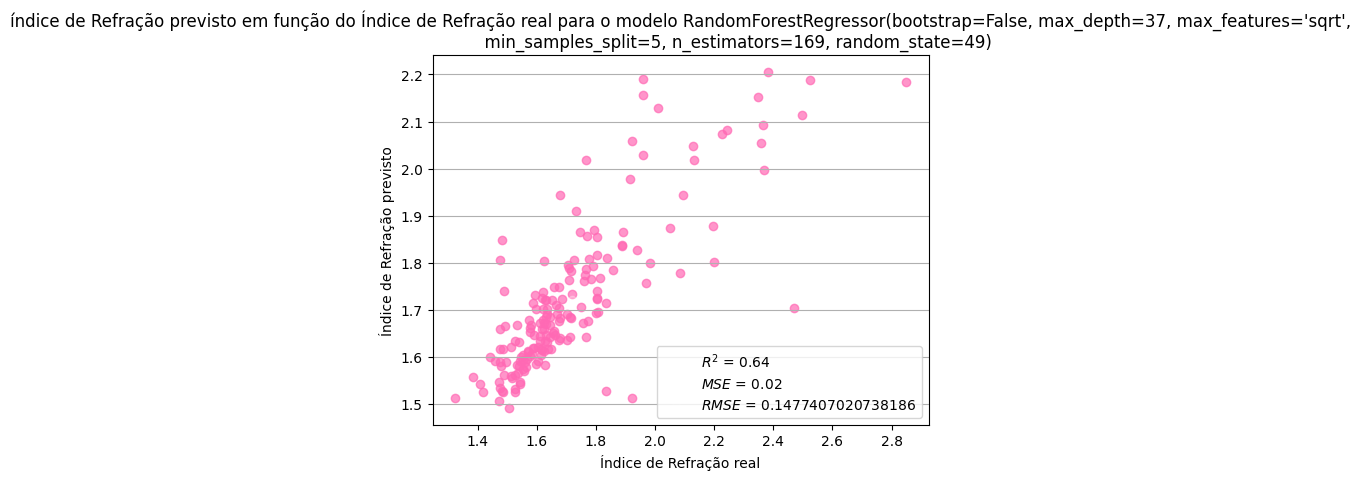

As estatísticas de erro do modelo sem tratamento tiveram pior desempenho que o modelo por VIF:

Estatísticas do VIF:
['0.66', '0.02', 0.14165179073139694]
----
Estatísticas do modelo sem tratamento:
['0.64', '0.02', 0.1477407020738186]


In [32]:
teste(floresta_aleatoriA)

### Discussão

Novamente, a otimização de hiperparâmetros sucedeu em treinar um modelo que performou melhor nas métricas de erro. A modificação de hiperparâmetros pode ter modificado a forma com que os dados são divididos, e isso explicaria a performance do modelo treinado com dados reduzidos ter sido superior à performance do modelo treinado sem tratamento.

# <p style = 'text-align:center;'> Resultados
De todos os modelos treinados, os que obtiveram melhor performance foram a floresta aleatória e o SVR. Isso pode ser explicado pela relativamente alta dimensionalidade do dataframe, e que por consequência se concilia melhor com modelos que estejam adaptados a isso. As performances de cada modelo podem ser observadas abaixo:
    
| Modelo                               | Tratamento       | R²    | MSE  | RMSE   |
|--------------------------------------|------------------|-------|------|--------|
| Baseline                             | -                | -0.00 | 0.06 | 0.2447 |
| Linear                               | VIF              | 0.10  | 0.05 | 0.2319 |
| Linear                               | Sem tratamento   | 0.05  | 0.06 | 0.2383 |
| Árvore de Decisão                    | VIF              | 0.37  | 0.04 | 0.1940 |
| Árvore de Decisão                    | Sem tratamento   | 0.46  | 0.03 | 0.1801 |
| Floresta Aleatória                   | VIF              | 0.65  | 0.02 | 0.1441 |
| Floresta Aleatória                   | Sem tratamento   | 0.65  | 0.02 | 0.1438 |
| k-NN                                 | VIF              | 0.46  | 0.03 | 0.1805 |
| k-NN                                 | Sem tratamento   | 0.03  | 0.06 | 0.2411 |
| SVR                                  | VIF              | 0.59  | 0.02 | 0.1576 |
| SVR                                  | Sem tratamento   | 0.02  | 0.06 | 0.2417 |
| SVR (Otimização de Hiperparâmetros)  | VIF              | 0.64  | 0.02 | 0.1475 |
| SVR (Otimização de Hiperparâmetros)  | Sem tratamento   | 0.08  | 0.05 | 0.2342 |
| Floresta Aleatória (Hiperparâmetros) | VIF              | 0.66  | 0.02 | 0.1416 |
| Floresta Aleatória (Hiperparâmetros) | Sem tratamento   | 0.63  | 0.02 | 0.1477 |

    
Como é possível visualizar, as melhores performances em métricas de erro também implicam maior linearidade na relação entre o target real e o target previsto. Em um modelo ideal, teríamos uma reta perfeita, já que todos os targets previstos teriam o mesmo valor que o target real. Apesar disso, nossos achados representam uma melhora significativa em relação ao modelo baseline, de cerca de 30% em relação ao RMSE.  
    
A otimização de hiperparâmetros se provou útil em todos os casos, e melhorou o RMSE em até próximo de 0.01 unidades de RMSE.
    
Por fim, vimos que o tratamento dos dados com VIF pode ser benéfico para a previsão do índice de refração, especialmente quando associados a uma otimização de hiperparâmetros. Sua melhora foi significativa especialmente nos modelos k-NN e SVR, que tiveram uma melhora de aproximadamente 0.06 e 0.09 unidades de RMSE, respectivamente. 
    

# <p style = 'text-align:center;'> Discussões
Uma seleção de atributos baseada por outro critério poderia ter trazido resultados mais proveitosos para o algoritmo. Além disso, buscas mais custosas para melhoria de hiperparâmetros, como por exemplo utilizando o Optuna, seriam úteis para melhorar as métricas de erro. Apesar disso, os modelos conseguiram prever com certa precisão os índices de refração, o que é positivo. 

# <p style  = 'text-align:center;'>  Conclusão
Consideramos que o trabalho foi bem-sucedido em prever o índice de refração de alguns minerais a partir de informações físico-químicas deles, com um mínimo de erro no RMSE de 0.1416. Os melhores modelos foram o SVR e a floresta aleatória, e uma otimização de hiperparâmetros sucedeu em tornar o modelo mais eficaz. Por fim, o tratamento dos dados com VIF parece ser benéfico para o treinamento do modelo, visto que melhorou as métricas de erro de forma geral. 

# <p style = 'text-align:center;'> Referências

O dataframe pode ser extraído e é explicado no site:
    
[1] Dataset Origin: https://www.kaggle.com/datasets/vinven7/comprehensive-database-of-minerals?resource=download.

[2] Github: https://github.com/Guilherme-Sobreira/Projeto_Materiais_ML
    
[3] Material didático - ATP - 203 (Aprendizado de Máquina) - Ministrada pelo professor Daniel Roberto Cassar.

[4] PennState University: Eberly College of Science. Applied Regression Analysis (STAT 462): *10.7 - Detecting Multicolilinearity Using Variance Inflation Factors*. Disponível em: https://online.stat.psu.edu/stat462/node/180/. 
    
[5] Material didático - ATP - 203 (Aprendizado de Máquina) 7.1 - Seleção de Atributos. Prof. Daniel Cassar.
    
[6] Material didático - ATP - 203 (Aprendizado de Máquina) 4.0 - Split de dados em treino e teste. Prof. Daniel Cassar.
    
[7] https://github.com/matheuscamposmt/decision-trees. Acesso em: 25/11/2024.
    
[8] Material didático - ATP - 203 (Aprendizado de Máquina) 5.0 - Validação cruzada, busca aleatória e busca em grade. Prof. Daniel Cassar.